In [1]:
import yfinance as yf
import numpy as np
import pandas as pd 
from statsmodels.tsa.stattools import adfuller
import ripser
import persim
from scipy import stats
# ignore persim warnings
import warnings
warnings.filterwarnings("ignore")

# Load list of S&P 500 companies

In [2]:
df_sp500_companies = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [3]:
# get string of ticker names
ticker_names = str(df_sp500_companies['Symbol'].to_list()).replace("'", "").replace("[", "").replace("]", "").replace(",", "")
index_names = df_sp500_companies['Symbol'].to_list()
# Add overall S&P 500 stock index data --> aim to forecast it's values
index_names = ['^GSPC'] + index_names

In [4]:
# Set date range
start_date = "2018-01-01"
end_date = "2023-01-01"

# Get data from yahoo finance
index_data = yf.download(index_names, start=start_date, end=end_date)

[*********************100%***********************]  504 of 504 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted


In [5]:
# Work with adjusted closing prices; first remove empty columns, then remove rows with NaNs
df_close = index_data['Adj Close'].dropna(axis='columns').dropna(axis='rows')
# Work with numpy array for easier computation
close_data = df_close.to_numpy()
# Compute log-returns of two subsequent days
log_returns = np.log(np.divide(close_data[1:],close_data[:len(close_data)-1]))

# Separate by S&P 500 index stock and individual components

In [6]:
# S&P 500
log_returns_sp500 = log_returns[:,0]
close_data_sp500 = close_data[:,0]
# individual components
log_returns_indiv = log_returns[:,1:]
close_data_indiv = close_data[:,1:]

In [7]:
import matplotlib.pyplot as plt

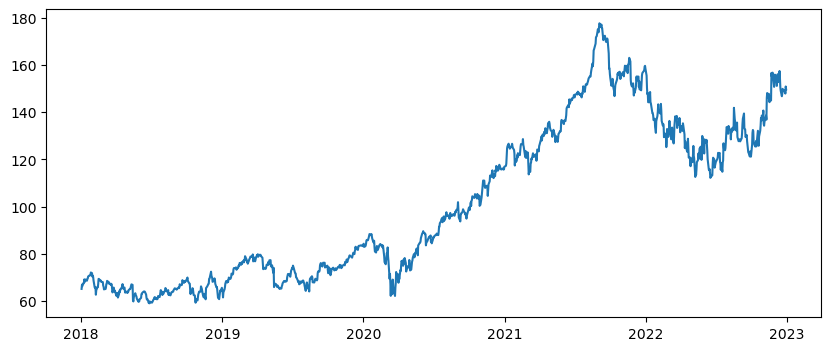

In [8]:
plt.figure(figsize=(10,4))
plt.plot(df_close.index, close_data_sp500);